## Leitura dos dados

Bibliotecas utilizadas:

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Realizando a leitura dos dados e os salvando em uma variável.

In [ ]:
fifa21 = pd.read_csv('/content/players_21.csv')
pd.set_option('display.max_columns',None)

In [ ]:
fifa21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

********************************************************************************
### Informações sobre o nosso conjunto de dados
********************************************************************************


O que cada coluna significa?

In [ ]:
print(fifa21.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_ba



**sofifa_id**: Número de identidade do jogador no banco de dados. Dado aleatório, apenas para indexar no site oficial.

**player_url**: Link para a página que contém os dados dispostos.

**short_name**: Versão curta do nome do jogador. Nessa coluna encontra-se o nome por qual o jogador é mais conhecido e que - geralmente - está disposto na camisa de seu time.

**long_name**: Versão completa do nome do jogador.

**age**: Idade do jogador.

**dob**: Data de nascimento do jogador.

**height_cm**: Altura do jogador em centímetros.

**weight_kg**: Peso do jogador em kilogramas.

**nationality**: Nacionalidade do jogador.

**club_name**: Clube (time) onde o jogador se encontra atualmente.

**league_name**: Liga na qual o jogador compete - referente ao time que atua.

**league_rank**: Divisão na qual o clube que o jogador atua se encontra, na vida real.

**overall**: Avaliação geral da carta do jogador. Primariamente baseada nos critérios de ritmo, finalização, passe, defesa, dribles e físico - porém possue muitos outros critérios que interferem no resultado final.

**potential**: Overall máximo que a carta do jogador pode atingir, em modos do jogo em que é possível realizar esse aumento.

**value_eur**: Custo, no jogo, para obter a carta do jogador.

**wage_eur**: Salário, no jogo, do jogador.

**player_positions**: Posições em que o jogador joga

**preferred_foot**: Pé com qual o jogador dá preferência e possuí mais habilidade.

**international_reputation**: Reputação internacional do jogador, em uma escala de 1 à 5. Interfere principalmente no overall do jogador.

**weak_foot**: Mede o nível de habilidade do jogador, em uma escala de 1 à 5, com o pé que não é de sua preferência - ou seja, o pé mais 'fraco'.

**skill_moves**:  Mede o nível de habilidade do jogador, em uma escala de 1 à 5, para realização de fintas.

**work_rate**: Mede a dedicação do jogador para atacar e defender, respectivamente, alterando seu posicionamento no campo.

**body_type**: Modelo do corpo 3D exibido no jogo. Para modelos únicos, criados especificadamente para um jogador, temos o próprio nome do jogador nessa coluna. Caso contrário, temos uma tag que indica qual é o modelo utilizado para esse jogador.

**real_face**: Se o rosto exibido no jogo é um modelo 3D baseado em um jogador da realidade.

**release_clause_eur**: Custo da cláusula de recisão de contrato com o jogador.

**player_tags**: Especialidades e características do jogador em campo.

**team_position**: Posição que atua, na vida real, em seu clube.

**team_jersey_number**: Número da camisa que utiliza em seu clube na vida real.

**loaned_from**: Clube ao qual o jogador pertence. O jogador atua por empréstimo em seu _club_name_.

**joined**: Data em que entrou no time que atua na vida real.

**contract_valid_until**: Prazo de validade do contrato do jogador com o time que representa na vida real.

**nation_position**: Posição que atua, na vida real, na seleção de seu país.

**nation_jersey_number**: Número da camisa que utiliza na seleção de seu país, na vida real.

**player_traits**: Características do jogador em campo.

As colunas abaixo são referentes aos atributos principais do jogador em jogo, em uma escala de 0-100. Nas legendas temos o atributo referido.

**pace**: Ritmo

**shooting**: Finalização

**passing**: Passe

**dribbling**: Condução

**defending**: Defesa

**physic**: Físico


**gk_diving**: Atributo de goleiro - Elasticidade

**gk_handling**: Atributo de goleiro - Manejo

**gk_kicking**: Atributo de goleiro - Chute

**gk_reflexes**: Atributo de goleiro - Reflexos

**gk_speed**: Atributo de goleiro - Velocidade

**gk_positioning**: Atributo de goleiro - Posicionamento

**attacking_crossing**: Atributo de ataque - Cruzamento

**attacking_finishing**: Atributo de ataque - Finalização

**attacking_heading_accuracy**: Atributo de ataque - Cabeceio

**attacking_short_passing**: Atributo de ataque - Passe curto

**attacking_volleys**: Atributo de ataque - Voleio

**skill_dribbling**: Atributo de habilidade - Firula

**skill_curve**: Atributo de habilidade - Curva

**skill_fk_accuracy**: Atributo de habilidade - Precisão para faltas

**skill_long_passing**: Atributo de habilidade - Passe longo

**skill_ball_control**: Atributo de habilidade - Controle de bola

**movement_acceleration**: Atributo de movimento - Aceleração

**movement_sprint_speed**: Atributo de movimento - Velocidade de arrancada

**movement_agility**: Atributo de movimento - Agilidade

**movement_reactions**: Atributo de movimento - Reação

**movement_balance**: Atributo de movimento - Equilíbrio

**power_shot_power**: Atributo de potência - Poder de chute

**power_jumping**: Atributo de potência - Pulo

**power_stamina**: Atributo de potência - Energia

**power_strength**: Atributo de potência - Força

**power_long_shots**: Atributo de potência - Chute longo

**mentality_aggression**: Atributo de mentalidade - Agressão

**mentality_interceptions**: Atributo de mentalidade - Interceptações

**mentality_positioning**: Atributo de mentalidade - Posicionamento

**mentality_vision**: Atributo de mentalidade - Visão

**mentality_penalties**: Atributo de mentalidade - Pênaltis

**mentality_composure**: Atributo de mentalidade - Compostura

**defending_marking**: Atributo de defesa - Marcação

**defending_standing_tackle**: Atributo de defesa - Combate em pé

**defending_sliding_tackle**: Atributo de defesa - Carrinho

**goalkeeping_diving**: Atributo de goleiro - Elasticidade

**goalkeeping_handling**: Atributo de goleiro - Manejo

**goalkeeping_kicking**: Atributo de goleiro - Chute

**goalkeeping_positioning**: Atributo de goleiro - Posicionamento

**goalkeeping_reflexes**: Atributo de goleiro - Reflexos

Os seguintes atributos são referentes ao valor overral do jogador em diferentes posições. Ou seja, se ele está em suas posições de costume, a avaliação geral se mantém. Caso contrário, a avaliação tem seu valor adaptado. As legendas contém qual a posição referida.

**ls**: Atacante esquerdo

**st**: Centro avante

**rs**: Atacante direito

**lw**: Ponta esquerdo

**lf**: Atacante esquerdo - 2

**cf**: Segundo atacante

**rf**: Atacante direito - 2

**rw**: Ponta direito

**lam**: Armador esquerdo

**cam**: Armador

**ram**: Armad

**lm**: Meia esquerda

**lcm**: Meia esquerdo - 2

**cm**: Meia central

**rcm**: Meia direito - 2

**rm**: Meia direita

**lwb**: Ala esquerdo

**ldm**: Volante esquerdo

**cdm**: Volante

**rdm**: Volante direito

**rwb**: Ala direito

**lb**: Lateral esquerdo

**lcb**: Zagueiro esquerdo

**cb**: Zagueiro

**rcb**: Zagueiro direito

**rb**: Lateral direito



---


# Pré-definições necessárias:



---



Paleta de cores 1:

In [ ]:
col1='rgb(0,191,255)'  # azul claro
col2='rgb(0,0,139)'    # azul escuro
col3='rgb(124,252,0)'  # verde claro
col4='rgb(255,20,147)' # rosa
col5='rgb(147,112,219)'# roxo
col6='rgb(255,255,0)'  # amarelo
cols=[col1,col2,col3,col4,col5,col6]

Paleta de cores 2:

In [ ]:
color1=(0,255/255,255/255,1)     # azul claro
color2=(127/255,255/255,0,1)     # verde claro
color3=(255/255,255/255,0,1)     # amarelo
color4=(255/255,140/255,0,1)     # laranja
color5=(255/255,15/255,10/255,1) # vermelho
colors=[color1,color2,color3,color4,color5]

Colunas para construção de gráficos:

In [ ]:
colunas = ['height_cm','weight_kg','right_foot','skill_moves','attacking_crossing',
            'attacking_finishing','attacking_heading_accuracy',
            'attacking_short_passing','attacking_volleys','skill_dribbling',
            'skill_curve','skill_fk_accuracy','skill_long_passing',
            'skill_ball_control','movement_acceleration','movement_sprint_speed',
            'movement_agility','movement_reactions','movement_balance',
            'power_shot_power','power_jumping','power_stamina','power_strength',
            'power_long_shots','mentality_aggression','mentality_interceptions',
            'mentality_positioning','mentality_vision','mentality_penalties',
            'mentality_composure','defending_marking','defending_standing_tackle',
            'defending_sliding_tackle']



---


# Pré-Processamento


---



Realizaremos aqui um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. É uma etapa fundamental que precede a realização do nosso processo de predição. Dividiremos nosso pré-processamento em limpeza, seguido por transformação e redução dos dados.

Inicialmente, removemos as colunas que não serão necessárias em nossa análise:

In [ ]:
fifa21_original = fifa21

fifa21 = fifa21.drop(columns=['player_url','long_name','dob','league_name','league_rank',
                              'value_eur','wage_eur','international_reputation','work_rate','body_type',
                              'real_face','release_clause_eur','player_tags','team_jersey_number',
                              'loaned_from','joined','contract_valid_until','nation_jersey_number',
                              'nation_position', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
                              'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
                              'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'])

fifa21.head()


,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club_name,overall,potential,player_positions,preferred_foot,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,33,170,72,Argentina,FC Barcelona,93,93,"RW, ST, CF",Left,4,4,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,20801,Cristiano Ronaldo,35,187,83,Portugal,Juventus,92,92,"ST, LW",Right,4,5,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,200389,J. Oblak,27,188,87,Slovenia,Atlético Madrid,91,93,GK,Right,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,188545,R. Lewandowski,31,184,80,Poland,FC Bayern München,91,91,ST,Right,4,4,ST,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,190871,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,91,91,"LW, CAM",Right,5,5,LW,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


## Limpeza dos dados:
Precisamos assegurar que nosso conjunto de dados não possua partes irrelevantes ou ausentes, uma vez que isso atrapalhará a manipulação dos mesmos.

Verificando se possuímos a presença de NaN no nosso dataset:

In [ ]:
fifa21_check=fifa21.isnull()

print(fifa21_check)

       sofifa_id  short_name    age  height_cm  weight_kg  nationality  \
0          False       False  False      False      False        False   
1          False       False  False      False      False        False   
2          False       False  False      False      False        False   
3          False       False  False      False      False        False   
4          False       False  False      False      False        False   
...          ...         ...    ...        ...        ...          ...   
18939      False       False  False      False      False        False   
18940      False       False  False      False      False        False   
18941      False       False  False      False      False        False   
18942      False       False  False      False      False        False   
18943      False       False  False      False      False        False   

       club_name  overall  potential  player_positions  preferred_foot  \
0          False    False      False 

Podemos verificar a presença de vários NaN, porém é necessário analisarmos o posicionamento destes ao invés de simplesmente excluí-los.
Quando um jogador apresenta NaN em atributos de goleiro, significa que ele não atua nessa posição - e o mesmo serve para os goleiros, que não possuí atributos de jogadores de linha. Se apenas removermos as linhas com NaN, teríamos um dataset vazio. Desse modo, posteriormente faremos a divisão entre goleiros e jogadores de linha para resolver esse problema. Também vemos que a coluna 'defending_marking' está vazia, o que é necessário corrigir.

Vemos que a última linha apresenta erro, com vários atributos nulos errôneamente - que não entram no caso explicado acima. Para evitar conflitos, iremos excluí-la.

In [ ]:
fifa21.drop(fifa21.tail(1).index,inplace=True)

Verificando se possuímos linhas duplicadas:

In [ ]:
fifa21.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18938    False
18939    False
18940    False
18941    False
18942    False
Length: 18943, dtype: bool

Como averiguado, não possuímos linhas duplicadas.

Na coluna de player_positions, temos uma string que retorna várias posições possíveis do jogador exercer. Entretanto, isso tornaria a nossa análise muito complicada. Por isso, optamos por dispor apenas a primeira posição exibida.

In [ ]:
def posicao(row):
    return row.player_positions.partition(',')[0]

In [ ]:
fifa21['player_positions']=fifa21.apply(posicao,axis=1)

## Redução e transformação dos dados
O próximo passo do nosso pré processamento é o agrupamento de posições com funções similares. Desse modo, restringiremos o número de posições possíveis de modo a um jogador ter apenas uma posição principal. Teremos como as posições:

As posições ST e CF serão transformadas em ST

As posições LW, RW, LM e RM serão transformadas em WF

As posições CAM, CDM e CM serão transformadas em CM

As posições LWB, RWB, LB e RB serão transformadas em WB

A posição CB será mantida.

A posição GK será mantida.


In [ ]:
def reduz_pos(row):
    if row.player_positions in ['ST','CF']:
        return 'ST'
    if row.player_positions in ['LW','RW','LM','RM']:
        return 'WF'
    if row.player_positions in ['CAM','CDM','CM']:
        return 'MF'
    if row.player_positions in ['LWB','RWB','LB','RB']:
        return 'WB'
    if row.player_positions in ['CB']:
        return 'CB'
    if row.player_positions in ['GK']:
        return 'GK'

In [ ]:
fifa21['rough_position']=fifa21.apply(reduz_pos,axis=1)

Também criaremos uma coluna que nos retorna um número de -5 a 5 pra indicar o quanto o pé direito de um jogador é mais forte do que o esquerdo. Ou seja, o melhor cenário é o jogador ser ambidestro e possuir 0 como diferença, indicando que os dois pés são igualmente bons; enquanto quanto mais extremo o valor, pior o cenário.

In [ ]:
def pe_direito(row):
    if row.preferred_foot=='Right':
        return 5-row.weak_foot
    else:
        return row.weak_foot-5

In [ ]:
fifa21['right_foot']=fifa21.apply(pe_direito,axis=1)

Por fim, estaremos preenchendo a coluna 'defending_marking', utilizando uma estimação pelos demais atributos defensivos.

In [ ]:
def def_marking(row):
    if row['player_positions']!='GK':
        return int(3*row['defending']-row['defending_standing_tackle']-row['defending_sliding_tackle'])
    else:
        return np.nan

In [ ]:
fifa21['defending_marking']=fifa21.apply(def_marking, axis=1)

Separando os jogadores que são goleiros dos jogadores de linha, adicionando como subset seus principais atributos:

In [ ]:
goleiros = fifa21[fifa21['player_positions']=='GK']

goleiros = goleiros.dropna(axis=1,how='all')

goleiros = goleiros.dropna(axis=0,how='any',subset=('gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'))


jogadores = fifa21[fifa21['player_positions']!='GK']

jogadores = jogadores.dropna(axis=1,how='all')

jogadores = jogadores.dropna(axis=0,how='any',subset=('pace','shooting','passing','dribbling','defending','physic','pace'))

Dataset atualizado após o pré-processamento:

In [ ]:
fifa21.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club_name,overall,potential,player_positions,preferred_foot,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,rough_position,right_foot
0,158023,L. Messi,33,170,72,Argentina,FC Barcelona,93,93,RW,Left,4,4,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,55.0,35,24,6,11,15,14,8,WF,-1
1,20801,Cristiano Ronaldo,35,187,83,Portugal,Juventus,92,92,ST,Right,4,5,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,49.0,32,24,7,11,15,14,11,ST,1
2,200389,J. Oblak,27,188,87,Slovenia,Atlético Madrid,91,93,GK,Right,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,GK,2
3,188545,R. Lewandowski,31,184,80,Poland,FC Bayern München,91,91,ST,Right,4,4,ST,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,68.0,42,19,15,6,12,8,10,ST,1
4,190871,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,91,91,LW,Right,5,5,LW,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,49.0,30,29,9,9,15,15,11,WF,0




---


# Análise descritiva


---



Iniciamos nossa análise descritiva observando quantos jogadores estão em cada posição no início:


In [ ]:
def add(row):
    df_pos[row.player_positions][0]+=1

todas_pos = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
         'LB','LCB','CB','RCB','RB','GK']

df_pos = pd.DataFrame(np.zeros(27).reshape(1,27),columns=todas_pos)

fifa21.apply(add,axis=1)

df_pos=df_pos.loc[:,~(df_pos==0).all()]

fig = px.pie(df_pos, values=df_pos.loc[0,:], names=df_pos.columns,
             title='Gráfico de setores - Proporção de Jogadores por Posição',
             color_discrete_sequence=px.colors.sequential.Sunsetdark)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

No gráfico acima é  mostrado que a posição CB encontra-se em primeiro lugar, seguida por ST, CM, GK, CDM, LB, RB, CAM, LM, RM, LW, CF, LWB e RWB.

Agora, analisaremos separadamente a distribuição da classe de goleiros:



In [ ]:
legenda_jogador = ['PAC','SHO','PAS','DRI','DEF','PHY']
colunas_jogador = ['pace','shooting','passing','dribbling','defending','physic']
valores_jogador = [jogadores.loc[:,i] for i in colunas_jogador]

legenda_goleiro = ['DIV','HAN','KIC','REF','SPD','POS']
colunas_goleiro = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
valores_goleiro = [goleiros.loc[:,i] for i in colunas_goleiro]

for i in range(2):

    fig=go.Figure()

    for label, val, col in zip(legenda_jogador if i==0 else legenda_goleiro, valores_jogador if i==0 else valores_goleiro, cols):
        fig.add_trace(go.Box(y=val,name=label,boxpoints='outliers',pointpos=-1.2,marker_color=col,line_color=col))

    fig.update_layout(title_text="Boxplot Jogadores de Linha" if i==0 else "Boxplot Goleiros")
    fig.show()

Como resultado, observamos uma ampla distribuição nos atributos de tiro e defesa. Além disso, a velocidade dos goleiros indica ser geralmente mais lenta.


Em seguida, analisaremos a diferença de dados entre jogadores que se encontram em posições diferentes.

No gráfico de calor a seguir, a coordenada ”y” representa os atributos básicos do jogador, e a cor do quadrado representa o nível médio desse atributo naquela posição.

In [ ]:
jogador_pos=['ST','LW','CF','RW','CAM','LM','CM','RM','LWB','CDM','RWB','LB','CB','RB']

legenda_atributos = ['PAC','SHO','PAS','DRI','DEF','PHY']
atributos_principais = ['pace','shooting','passing','dribbling','defending','physic']

legenda_atributos = legenda_atributos[::-1]
atributos_principais = atributos_principais[::-1]

sta=pd.DataFrame(np.zeros(84).reshape((6,14)),index=atributos_principais,columns=jogador_pos)

for atributo in atributos_principais:
    for pos in jogador_pos:
        sta[pos][atributo]=sum(jogadores[atributo][jogadores['player_positions']==pos])/len(list(jogadores[atributo][jogadores['player_positions']==pos]))

fig=go.Figure(data=go.Heatmap(
    x=jogador_pos,
    y=legenda_atributos,
    z=sta,
    type='heatmap',
    colorscale='Sunsetdark'))
fig.update_layout(title='Distribuição da avaliação média de cada atributo dos jogadores por posições')
fig.show()

Como resultado, observamos que os jogadores em posições de ataque possuem uma defesa mais baixa, enquanto que os jogadores em posições de defesa possuem uma finalização mais baixa. Além disso, vale ressaltar que o atributo 'pace', que representa a velocidade do jogador, é tido como bem valorizado para posições em geral.



---


# Engenharia de atributos


---



A seguir, utilizamos os métodos PCA (Análise de Componentes Principais) e LDA (Análise Discriminante Linear) separadamente para encontrar as características de vários atributos.


In [ ]:
show_data = jogadores[jogadores.overall>=80]
X = show_data[colunas]
Y = show_data['rough_position']

pca = PCA(n_components=3)
components_pca = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components_pca, x=0, y=1, z=2, color=Y,color_discrete_map={'ST':col1,'WF':col6,'MF':col3,'WB':col4,'CB':col5},
    title=f'PCA (Variância total: {total_var:.2f}%)',
    labels={'0': 'Dim 1', '1': 'Dim 2', '2': 'Dim 3'},
    hover_name=show_data['short_name'],opacity=0.7
)
fig.show()
lda = LinearDiscriminantAnalysis(n_components=3)
components_lda = lda.fit_transform(X,Y)

fig = px.scatter_3d(
    components_lda, x=0, y=1, z=2, color=Y,color_discrete_map={'ST':col1,'WF':col6,'MF':col3,'WB':col4,'CB':col5},
    title='LDA',
    labels={'0': 'Dim 1', '1': 'Dim 2', '2': 'Dim 3'},
    hover_name=show_data['short_name'],opacity=0.7
)
fig.show()

Ampliando o mapa de projeção do LDA, podemos facilmente encontrar alguns jogadores que são bons em jogar múltiplas posições nesses outliers, como é o caso do Fernandinho e do Javi Martínez.


Com a finalidade de analisar com uma maior precisão jogadores mais populares tais como o Messi e o Cristiano Ronaldo, podemos realizar a plotagem acima restringindo aos jogadores com avaliação geral maior que 86. Vale reforçar, que estes possuem as melhores cartas do jogo e por isso entram na categoria popular de 'andadores'.

In [ ]:
show_data = jogadores[jogadores.overall>=86]
X = show_data[colunas]
Y = show_data['rough_position']

pca = PCA(n_components=3)
components_pca = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components_pca, x=0, y=1, z=2, color=Y,color_discrete_map={'ST':col1,'WF':col6,'MF':col3,'WB':col4,'CB':col5},
    title=f'PCA (Variância total: {total_var:.2f}%)',
    labels={'0': 'Dim 1', '1': 'Dim 2', '2': 'Dim 3'},
    hover_name=show_data['short_name'],opacity=0.7
)
fig.show()
lda = LinearDiscriminantAnalysis(n_components=3)
components_lda = lda.fit_transform(X,Y)

fig = px.scatter_3d(
    components_lda, x=0, y=1, z=2, color=Y,color_discrete_map={'ST':col1,'WF':col6,'MF':col3,'WB':col4,'CB':col5},
    title='LDA',
    labels={'0': 'Dim 1', '1': 'Dim 2', '2': 'Dim 3'},
    hover_name=show_data['short_name'],opacity=0.7
)
fig.show()

Podemos ver pelo LDA que Messi e Mbappe possuem um estilo de jogo - em relação ao posicionamento - muito similar, enquanto, que no PCA Messi e Cristiano surgem com destaque por conta de suas avaliações gerais.



---


# Classificação



---



Para a classificação, de acordo com nossos conhecimentos prévios, optamos por utilizar os modelos Naive Bayes e Random Forest para realizar a predição de posições dado um jogador fictício.


Para isto, precisamos dividir o conjunto de treinamento e o conjunto de teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(jogadores[colunas], jogadores['player_positions'], test_size=0.3)

**Modelo Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)

print('A nossa precisão é de:')
print(bayes.score(X_test, y_test))

A nossa precisão é de:
0.5662317121391854


Pode-se observar que usando Naive Bayes como classificador, obtivemos uma acurácia de aproximadamente 60%, valor não satisfatório.

**Modelo Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

print('A nossa precisão é de:')
print(rfc.score(X_test, y_test))

A nossa precisão é de:
0.6986951364175563


Note, que a partir do Random Forest houve uma melhora, chegando a aproximadamente 70 % de acurácia.  

A seguir, a fim de entendermos melhor o funcionamento do modelo Random Forest,  analisaremos a imporância de suas variáveis:

In [ ]:
fi=rfc.feature_importances_

fig = go.Figure()
sorted_indexes = fi.argsort()[::-1]
fig = px.bar(pd.DataFrame(np.array(colunas)[sorted_indexes],fi[sorted_indexes]),
             x=np.array(colunas)[sorted_indexes], y=fi[sorted_indexes],
             color=fi[sorted_indexes],
             hover_name=np.array(colunas)[sorted_indexes],
             labels={'x':'','y':'Importância'}, height=500, opacity=0.8
             )
fig.update_layout(title='Importância de atributos na Random Forest',xaxis=dict(tickangle=45))

Observando a importâncias dos recursos no método Random Forest, temos que o recurso 'Sliding Tackle' é o mais significante, enquanto 'Skill Moves' o de menos efeito. Isso nos dá os atributos que mais - e menos - alterarão os resultados de nossa predição.

Em seguida, tentaremos melhorar nossa precisão, trabalhando agora com um intervalo de três possíveis posições:

In [ ]:
legendas=jogador_pos.copy()
legendas.sort()

n = np.zeros(3*len(y_test)).reshape(3,len(y_test))

n = [[0 for i in range(len(y_test))] for j in range(3)]

pr = np.zeros(3*len(y_test)).reshape(len(y_test),3)

probabilidade = rfc.predict_proba(X_test[colunas])

for row in range(len(probabilidade)):
    for index, prob in enumerate(probabilidade[row]):
        for i in range(3):
            if prob > pr[row][i]:
                pr[row][i]=prob
                n[i][row]=legendas[index]
                break

acuracia=0

for i in range(len(y_test)):
    if y_test.iloc[i]==n[0][i] or y_test.iloc[i]==n[1][i] or y_test.iloc[i]==n[2][i]:
        acuracia+=1

print('A nossa precisão é de:')
print(acuracia/len(y_test))

A nossa precisão é de:
0.8343218663503361


Obtivemos uma melhora significativa na acurácia, chegando a aproximadamente 85%. Portanto, foi decidido a utilização do modelo Random Forest para nossa predição, retornando três possíveis classificações.

Elaboração da nossa função de predição:

In [ ]:
def rfc_predict_pos(novo_jogador):

    probabilidade = rfc.predict_proba(novo_jogador)

    n=[0 for i in range(3)]
    pr=[0 for i in range(3)]

    for index, prob in enumerate(probabilidade[0]):
        for i in range(3):
            if prob > pr[i]:
                pr[i]=prob
                n[i]=index
                break

    print('Posição mais provável: {}'.format(legendas[n[0]]))
    print('Posições potenciais: {} {}'.format(legendas[n[1]],legendas[n[2]]))



---


# Jogadores similares:



---



Nesta parte do trabalho, nosso objetivo é realizar uma análise em cima das forças e fraquezas dos jogares.


**Observação:** Note que qualquer pessoa pode inserir seus próprios atributos e simular seu desempenho no FIFA-21.




**Funcionamento:** Cada jogador no conjunto de dados é identificado exclusivamente por um ID.

O ID de alguns jogadores famosos são os seguintes:

L. Messi: 158023

C. Ronaldo: 20801

Neymar Jr: 190871

Sergio Ramos: 155862

J. Oblak: 200389

Você pode buscar por um ID no site: https://sofifa.com/

**Simulação**

Para melhor visualização do código, foi deixado um ID exemplo a ser rodado em forma de comentário, basta realizar a substituição no código.

In [ ]:
print('Caso você não saiba um ID, pode consultar em https://sofifa.com/')
sofifa_id = int(input('Digite aqui o ID do seu jogador:'))

#sofifa_id=20801 # ID exemplo Cristiano Ronaldo

Caso você não saiba um ID, pode consultar em https://sofifa.com/
Digite aqui o ID do seu jogador:190871


Impressão das informações básicas do jogador:

In [ ]:
def info_base(jogador):
    if jogador.empty:
        print("Não foi possível encontrar um jogador com o seguinte ID = "+str(sofifa_id))
    else:
        jogador=jogador.reset_index()
        print()
        print('ID do jogador: '+str(jogador['sofifa_id'][0]))
        print()
        print('Nome: '+jogador['short_name'][0])
        print('Idade: '+str(jogador['age'][0]))
        print('Nacionalidade: '+jogador['nationality'][0])
        print('Clube: '+jogador['club_name'][0])
        print('Posição: '+jogador['player_positions'][0])
        print('Avaliação geral: '+str(jogador['overall'][0]))
        print()

jogador=fifa21[fifa21['sofifa_id']==sofifa_id].reset_index()
info_base(jogador)


ID do jogador: 190871

Nome: Neymar Jr
Idade: 28
Nacionalidade: Brazil
Clube: Paris Saint-Germain
Posição: LW
Avaliação geral: 91



Para melhor visualizar, segue gráfico de radar com os atributos básicos do jogador escolhido:

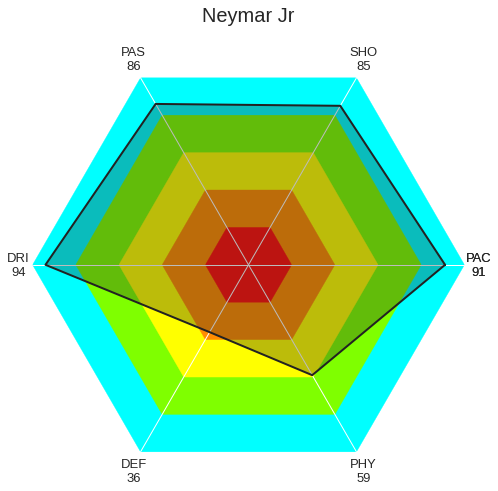

In [ ]:
plt.style.use('seaborn')

def grafico_radar(jogador):

    jogador=jogador.reset_index()

    # definindo hexágono:
    angles=np.linspace(0,2*np.pi,6,endpoint=False)

    angles=np.concatenate((angles, [0]))

    # gráfico de radar para jogadores de linha:
    if jogador.player_positions[0]!='GK':
        colunas=jogador.loc[0,['pace','shooting','passing','dribbling','defending','physic','pace']]
        legenda=('PAC\n{:d}'.format(int(jogador.loc[0,'pace'])),
                'SHO\n{:d}\n'.format(int(jogador.loc[0,'shooting'])),
                'PAS\n{:d}\n'.format(int(jogador.loc[0,'passing'])),
                'DRI\n{:d}'.format(int(jogador.loc[0,'dribbling'])),
                '\nDEF\n{:d}'.format(int(jogador.loc[0,'defending'])),
                '\nPHY\n{:d}'.format(int(jogador.loc[0,'physic'])),
                'PAC\n{:d}'.format(int(jogador.loc[0,'pace'])))

    # gráfico de radar para goleiros:
    else:
        colunas=jogador.loc[0,['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','gk_diving']]
        legenda=('DIV\n{:d}'.format(int(jogador.loc[0,'gk_diving'])),
                'HAN\n{:d}\n'.format(int(jogador.loc[0,'gk_handling'])),
                'KIC\n{:d}\n'.format(int(jogador.loc[0,'gk_kicking'])),
                'REF\n{:d}'.format(int(jogador.loc[0,'gk_reflexes'])),
                '\nSPD\n{:d}'.format(int(jogador.loc[0,'gk_speed'])),
                '\nPOS\n{:d}'.format(int(jogador.loc[0,'gk_positioning'])),
                'DIV\n{:d}'.format(int(jogador.loc[0,'gk_diving'])))

    # definição das nossas retas para construção do gráfico:

    fig=plt.figure(figsize=(6,6))

    reta0 = [0, 0, 1, 1]
    reta1 = [0.00005, 0.00005, 0.9999, 0.9999]
    reta2 = [0.1, 0.1, 0.8, 0.8]
    reta3 = [0.2, 0.2, 0.6, 0.6]
    reta4 = [0.3, 0.3, 0.4, 0.4]
    reta5 = [0.4, 0.4, 0.2, 0.2]

    retas = [reta1,reta2,reta3,reta4,reta5]

    # montagem e plotagem do gráfico:

    for reta,col in zip(retas,colors):
        bk=plt.axes(reta,projection='polar')
        bk.fill(angles,[1,1,1,1,1,1,1],color=col)
        bk.set_ylim(0,1)
        bk.axis('off')

    radar = plt.axes(reta0,projection='polar')

    radar.plot(angles,colunas,color='#222222',linestyle="-",lw=2)

    radar.fill(angles,colunas,color='#222222',alpha=0.3)

    radar.set_thetagrids(angles/np.pi*180,legenda,fontsize=13)

    radar.set_title(jogador.short_name[0],fontsize=20)

    radar.patch.set_alpha(0)

    radar.set_rticks([])

    radar.set_ylim(0,100)

    plt.show()

grafico_radar(jogador)

A seguir, faremos a **análise dos pontos fortes e fracos desse jogador.**

Método: são selecionados todos os jogadores cuja posição é a mesma do jogador escolhido e cuja classificação geral difira em 5 da deste jogador. Em seguida, é realizado o cálculo da classificação de cada atributo deste jogador entre todos os jogadores que forem selecionados, escolhendo o atributo de maior classificação como força e o com menor como a fraqueza.


In [ ]:
def forte_fraco(player):

    jogadores_prox = fifa21[(fifa21.rough_position==player.rough_position[0])
                     &(abs(fifa21.overall-player.overall[0])<=5)
                     &(fifa21.sofifa_id!=player.sofifa_id[0])]

    comp_attr = [i for i in colunas if i not in ['height_cm','weight_kg','right_foot','skill_moves']]

    rank=pd.DataFrame(np.zeros(len(comp_attr)).reshape(1,-1),columns=comp_attr)

    for attr in comp_attr:
        rank[attr][0]=sum(jogadores_prox.apply(lambda row: 1 if row[attr]>player[attr][0] else 0,axis=1))

    rank=rank.apply(lambda col: col/len(jogadores_prox),axis=0)

    sorted_rank=rank.loc[0,:].argsort()

    forca = []
    fraqueza = []

    for attr in np.array(comp_attr)[sorted_rank]:
        if (rank.loc[0,attr]<=0.10 or len(forca)<3) and not np.isnan(player[attr][0]):
            forca.append(rank[attr])

    for attr in np.array(comp_attr)[sorted_rank[::-1]]:
        if (rank.loc[0,attr]>=0.90 or len(fraqueza)<3) and not np.isnan(player[attr][0]):
            fraqueza.append(rank[attr])

    forca=pd.DataFrame(forca).T.apply(lambda col:1-col,axis=0)
    fraqueza=pd.DataFrame(fraqueza).T

    for_x = pd.concat([forca, 1-forca], axis=0).T
    for_x.columns = ['mais','menos']
    for_x['mais'] = pd.to_numeric(100*for_x['mais']).round(0).astype(int)
    for_x['menos'] = pd.to_numeric(100*for_x['menos']).round(0).astype(int)
    for_x = np.array(for_x)
    for_y = list(forca.columns)

    fra_x = pd.concat([fraqueza, 1-fraqueza], axis=0).T
    fra_x.columns = ['mais','menos']
    fra_x['mais'] = pd.to_numeric(100*fra_x['mais']).round(0).astype(int)
    fra_x['menos'] = pd.to_numeric(100*fra_x['menos']).round(0).astype(int)
    fra_x = np.array(fra_x)
    fra_y = list(fraqueza.columns)

    colors = [col4,col6]
    legendas = ['Mais forte','Mais fraco']
    titulos = ['Força','Fraqueza']

    for t in range(2):
        if t==1:
            colors=colors[::-1]
            legendas=legendas[::-1]
        fig = go.Figure()
        x_data,y_data=[for_x,fra_x][t],[for_y,fra_y][t]
        for i in range(0, len(x_data[0])):
            for xd, yd in zip(x_data, y_data):
                fig.add_trace(go.Bar(
                    x=[xd[i]], y=[yd],
                    orientation='h',
                    marker=dict(color=colors[i],opacity=0.8,
                        line=dict(color=col3))))

        fig.update_layout(
            xaxis=dict(
                showgrid=False,
                showline=False,
                showticklabels=False,
                zeroline=False,
                domain=[0.1, 1]
            ),
            yaxis=dict(
                showgrid=False,
                showline=False,
                showticklabels=False,
                zeroline=False,
            ),
            barmode='stack',
            paper_bgcolor='rgb(248, 248, 255)',
            plot_bgcolor='rgb(248, 248, 255)',
            showlegend=False,
        )

        annotations = []

        for yd, xd in zip(y_data, x_data):
            annotations.append(dict(xref='paper', yref='y',
                                    x=0.09, y=yd,
                                    xanchor='right',
                                    text=str(yd)+' ({})'.format(str(int(player.loc[0,yd]))),
                                    font=dict(family='Arial',size=15,
                                              color=col2),
                                    showarrow=False))

            space = 0
            for i in range(len(xd)):
                    annotations.append(dict(xref='x', yref='y',
                                            x=space + (xd[i]/2), y=yd,
                                            text=str(xd[i]) + '%',
                                            font=dict(family='Arial',size=15,
                                                      color=col2),
                                            showarrow=False))
                    if yd == y_data[-1]:
                        annotations.append(dict(xref='x', yref='paper',
                                                x=space + (xd[i]/2), y=1+0.7/len(y_data),
                                                text=legendas[i],
                                                font=dict(family='Arial',size=15,
                                                          color=col1),
                                                showarrow=False))
                    space += xd[i]

        fig.update_layout(annotations=annotations,title=titulos[t]+' do jogador {}'.format(str(player.short_name[0])),
                          width=990, height=40*len(y_data)+110,
                          margin=dict(l=80, r=0, b=10, t=100, autoexpand=True),font=dict(size=20))

        fig.show()

forte_fraco(jogador)

Note que foi possível observar a porcentagem de jogadores semelhantes que é melhor que o jogador escolhido bem como a porcentagem de jogadores semelhantes mais fracos.



---


## Predição - Espaço Teste


---



Neste tópico, será disponibilizado um espaço para que personalizem seus próprios players.


**Funcionamento:** Inserir 'B' para usar os dados padrões de um jogador disponível no dataset do presente trabalho - ou seja, um jogador 'teste' apenas para fazer a verificação do código. Ou, C para criar seu próprio jogador.



In [ ]:
print('Entrada para a predição de posições de um jogador.')
print('Digite B para exibir um caso de teste, ou C para criar seu próprio jogador.')

print()
entrada = input()
print()


Entrada para a predição de posições de um jogador.
Digite B para exibir um caso de teste, ou C para criar seu próprio jogador.

B



De acordo com a fórmula abaixo, o sistema realiza o cálculo de seus atributos básicos, tais como finalização, defesa, etc. Todas os atributos não utilizados para nossa predição são preenchidos com NaN.

In [ ]:

# preenchimento dos atributos do jogador teste:
if entrada=='B':
    user_attr=pd.DataFrame(np.array([np.nan, np.nan, np.nan,
                                     180, 60, np.nan, np.nan,
                                     np.nan, np.nan, np.nan,
                                     np.nan, np.nan, 4, np.nan,
                                     np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                     60, 50, 40, 60, 60, 55, 30, 50, 50, 55,
                                     50, 50, 50, 55, 55, 40, 40, 60, 40, 40, 50,
                                     50, 65, 60, 50, 50, 40, 30, 20, np.nan, np.nan, np.nan,
                                     np.nan, np.nan, np.nan, 3]).reshape(1,-1),index=[0],columns=jogadores.columns)
    user_attr['short_name']='Jogador teste'

# criando seus próprios atributos:
else:
    print('Você deverá preencher com um valor entre 0-100 cada um dos atributos seguintes.')
    print('Essa escala indica o quão bom você é no seguinte fundamento, sendo 100 o valor máximo, indicando a perfeição.')
    print('\nPor favor, digite seus atributos em ordem, conforme eles aparecem:')
    user_attr=pd.DataFrame(index=[0],columns=jogadores.columns)
    user_attr['short_name'][0]=input('Nome:\n')
    for attr in colunas:
        user_attr[attr][0]=int(input('{}:\n'.format(attr)))

user_attr['pace']=int(0.45*user_attr['movement_acceleration']
                      +0.55*user_attr['movement_sprint_speed'])
user_attr['shooting']=int(0.05*user_attr['mentality_positioning']
                          +0.45*user_attr['attacking_finishing']
                          +0.20*user_attr['power_long_shots']
                          +0.05*user_attr['mentality_penalties']
                          +0.20*user_attr['power_shot_power']
                          +0.05*user_attr['attacking_volleys'])
user_attr['passing']=int(0.35*user_attr['attacking_short_passing']
                         +0.20*user_attr['mentality_vision']
                         +0.20*user_attr['attacking_crossing']
                         +0.15*user_attr['skill_long_passing']
                         +0.05*user_attr['skill_curve']
                         +0.05*user_attr['skill_fk_accuracy'])
user_attr['dribbling']=int(0.35*user_attr['skill_dribbling']
                           +0.35*user_attr['skill_ball_control']
                           +0.10*user_attr['movement_agility']
                           +0.05*user_attr['movement_balance']
                           +0.10*user_attr['movement_reactions']
                           +0.05*user_attr['mentality_composure'])
user_attr['defending']=int(0.30*user_attr['defending_marking']
                           +0.30*user_attr['defending_standing_tackle']
                           +0.20*user_attr['mentality_interceptions']
                           +0.10*user_attr['attacking_heading_accuracy']
                           +0.10*user_attr['defending_sliding_tackle'])
user_attr['physic']=int(0.50*user_attr['power_strength']
                        +0.25*user_attr['power_stamina']
                        +0.20*user_attr['mentality_aggression']
                        +0.05*user_attr['power_jumping'])

Agora, com base nos dados fornecidos e nas funções criadas anteriormente, podemos chamá-las e realizar a predição de qual posição você - ou o jogador teste - atuaria no FIFA 21. Para que melhor visualize, também é feita a plotagem do gráfico radar:

Posição mais provável: RM
Posições potenciais: CM ST



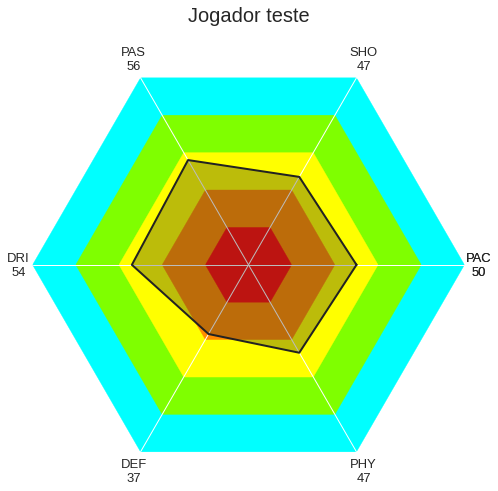

In [ ]:
rfc_predict_pos(user_attr[colunas])
print()

grafico_radar(user_attr)

É posível também, de acordo com a distância euclidiana, encontrar o jogador mais semelhante ao personalizado/escolhido por você no conjunto de dados. Isso, de acordo com os atributos inseridos.


Informações sobre um jogador similar:

ID do jogador: 197604

Nome: P. Jiménez
Idade: 36
Nacionalidade: Costa Rica
Clube: Nacional Potosí
Posição: LM
Avaliação geral: 61



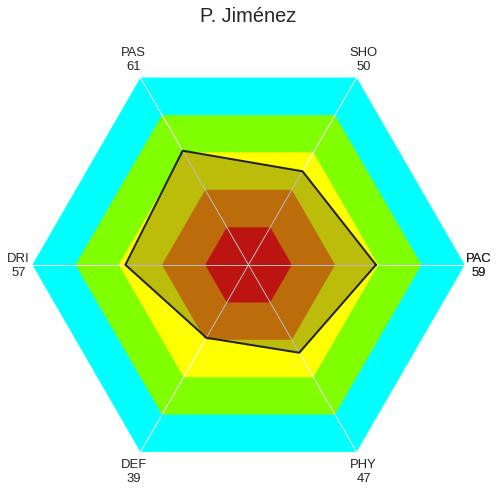

In [ ]:
self=user_attr
min_dis=-1
min_id=0

def jogador_similar(row):
    global min_dis,min_id

    dis=np.linalg.norm(row[colunas]-self.loc[0,colunas])

    if dis!=0 and (dis<min_dis or min_dis==-1):
        min_dis=dis
        min_id=row.sofifa_id

def goleiro_similar(row):

    global min_dis,min_id

    gk_attr=['Height(cm)','Weight(kg)','Right Foot','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']

    dis=np.linalg.norm(row[gk_attr]-self.loc[0,gk_attr])

    if dis!=0 and (dis<min_dis or min_dis==-1):
        min_dis=dis
        min_id=row.sofifa_id

jogadores.apply(jogador_similar,axis=1)

jogador_similar=jogadores[jogadores['sofifa_id']==min_id]

print('Informações sobre um jogador similar:')

info_base(jogador_similar)
grafico_radar(jogador_similar)



Com base na distância do cosseno, que retorna o jogador mais próximo cuja avaliação geral não seja inferior a 80, é possível encontrar jogadores ídolos que faclilitem o processo de aprendizagem. Em outras palavras, uma versão melhorada - porém mantendo a similaridade entre os atributos - do jogador inserido.

Informação sobre seu ídolo:

ID do jogador: 189596

Nome: T. Müller
Idade: 30
Nacionalidade: Germany
Clube: FC Bayern München
Posição: CAM
Avaliação geral: 86



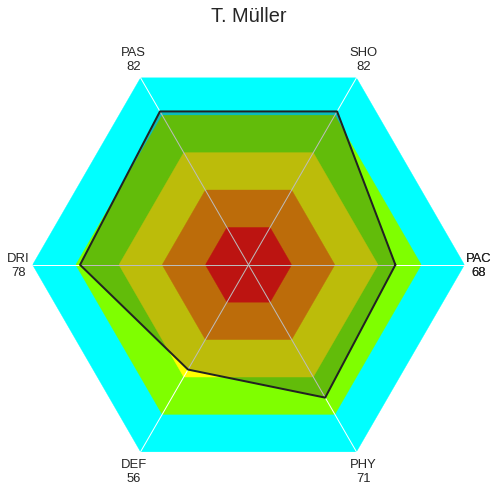

In [ ]:
self=user_attr
max_cos=-1
max_id=0

def idolo(row):
    global max_cos,max_id
    vector1=row[colunas]
    vector2=self.loc[0,colunas]
    cos=np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2)))
    if cos!=1 and cos>max_cos:
        max_cos=cos
        max_id=row.sofifa_id

show_data.apply(idolo,axis=1)

jogador_idolo = jogadores[jogadores['sofifa_id']==max_id]

print('Informação sobre seu ídolo:')

info_base(jogador_idolo)
grafico_radar(jogador_idolo)